# Translational Motion

This notebook develops solutions to the time-independent Schrödinger equation (TISE) for several translational problems (e.g., particle-in-a-box, tunneling through a one-dimensional barrier, etc.). Relevant Python code is provided to assist in visualizing the wave functions and obtaining numerical solutions to the TISE.

## The Free Particle

## Infinite Square Well Potential

### One-Dimensional Particle-in-a-Box

### Two- and Three-Dimensional Particle-in-a-Box

## Finite Square Well Potential

Consider a particle of mass, $m$, that is moving in the $x$-direction and experiences a finite square potential of width, $L$, and height, $V_0$. We will assume that the energy of this particle, $E$, is less than $V_0$. Graphically, this potential has the form:

In [13]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/deprincelab/deprincelab.github.io/main/tutorials/jupyter_notebooks/translation/square_well_potential.png")

Mathematically, we define this potential in a piecewise way as

**Region I**:

$V(x) = V_0$, $x < 0$

**Region II**:

$V(x) = 0$, $0 \le x \le L$

**Region III**: 

$V(x) = V_0$, $x > L$

### Wavefunctions

Wavefunctions that satisfy the time-independent Schrodinger equation will also have a piecewise form, and we can determine the wavefunction by solving the Schrodinger equation in each region. We have

**Region I**: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_I(x) = E \psi_I(x)$

which has solutions of the form

$\psi_I(x) = C~{\rm exp}(\alpha x) + D~{\rm exp}(-\alpha x)$, $x < 0$

**Region II**: 

$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} \psi_{II}(x) = E \psi_{II}(x)$

which has solutions of the form

$\psi_{II}(x) = A~{\rm cos}(\beta x) + B~{\rm sin}(\beta x)$, $0 \le x \le L$

and

**Region III**: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_{III}(x) = E \psi_{III}(x)$

which has solutions of the form

$\psi_{III}(x) = F~{\rm exp}(\alpha x) + G~{\rm exp}(-\alpha x)$, $x > l$

Above, $\alpha$ and $\beta$ are real numbers, defined by

$\alpha = ( 2 m [V_0 - E] / \hbar^2)^{1/2}$

$\beta = (2 m E / \hbar^2)^{1/2}$

### Boundary Conditions

If we consider that the wave function should be finite in the limit that $x$ tends to $\pm \infty$, then we immediately find that the coefficients $D$ and $F$ must be zero.

As for the other unknown coefficients, we can determine these through the application of various boundary conditions:

1. The wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $C = A$
    

2. The derivative of the wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $B = [(V_0 - E)^{1/2} / (E)^{1/2}] A$
    

3. The wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to 

    $G = A ~[ {\rm cos}(\beta L) + \alpha~ / \beta ~{\rm sin}(\beta L) ] ~{\rm exp}(\alpha L)$
    

4. The derivative of the wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to a trancendental equation for the energy: 

    ${\rm tan}[(2mE/\hbar^2)^{1/2} L] = 2 (V_0-E)(E)^{1/2}/(2 E-V_0)$
    

Lastly, the coefficent A can be determined by normalization.

### Procedure for visualizing the allowable wavefunctions

In order to determine the allowable energies and corresponding wavefunctions for the particle in a finite square well potential, we will follow the following steps:

1. We should specify parameters $m$, $L$, and $V_0$ that define our problem. 


2. We should plot the trancendental equation for the energy to (a) determine how many bound states we have and (b) to obtain reasonable guesses for these energies.


3. We should numerically solve the trancendental equation using some functionality in the scipy package.


4. Once we have the allowable energies, we can evaluate the corresponding wavefunction parameters defined above.


5. Given the wave function parameters, we can visualize the wavefunction or its square modulus.

In [2]:
# set some parameters (in atomic units, where hbar = 1)
m = 1.0 # mass of particle
L = 1.0 # length of box (from 0 to L)
V0 = 10.0

/var/folders/p7/jsnw6xvd0bx93ym71r58v0nm0000gn/T/ipykernel_26905/3550922940.py:12: RuntimeWarning: divide by zero encountered in divide
  rhs = 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)


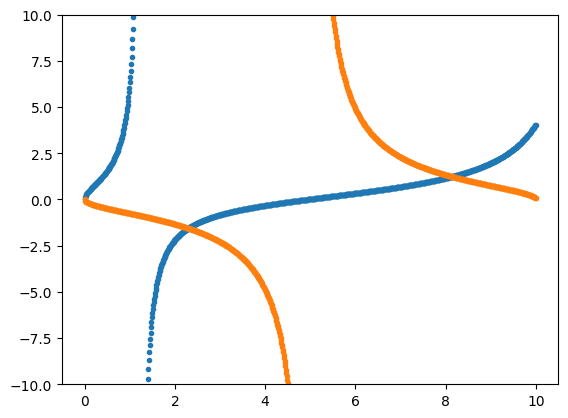

In [3]:
import numpy as np
import matplotlib.pyplot as plt

dE = 0.01
E = np.arange(0.0, V0, dE)
#lhs = []
#rhs = []
#for i in range(len(E)):
#    lhs.append(np.tan(np.sqrt(2 * m * E[i]) * L))
#    rhs.append(2 * np.sqrt(V0-E[i]) * np.sqrt(E[i]) / (2 * E[i] - V0))
lhs = np.tan(np.sqrt(2 * m * E) * L)
rhs = 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)

plt.figure()
plt.plot(E, lhs, marker='.', linestyle='')
plt.plot(E, rhs, marker='.', linestyle='')
plt.ylim(-10, 10)
plt.show()

From above, we can see that there are two allowable energies (points at which the blue and orange curves cross, not counting the divergence in the blue curve). These energies look like they are roughly 2.5 and 8.0 (atomic units). We now need to numerically solve the trancendental equation. We're going to use the function:

    optimize.fsolve
    
from the scipy package for this purpose. We will have to pass some objective function $f(E) = 0$ for which this function will find the optimal $E$ value(s).

In [4]:
def allowable_energies(E, *data):
    """
    function defining allowable energies:

    tan[sqrt(2mE) L] - 2sqrt(V-E)sqrt(E)/(2E-V0)

    :param E: the energy
    :return value: the function value
    """
    m, V0, L = data

    return np.tan(np.sqrt(2 * m * E) * L) - 2 * np.sqrt(V0-E) * np.sqrt(E) / (2 * E - V0)

Now, we're ready to solve for the allowable energies.

In [5]:
# solve for the allowable energy, with some reasonable initial guess
from scipy import optimize

E = optimize.fsolve(func = allowable_energies, x0 = [2.5, 8], args = (m, V0, L))

print('the allowable energies are', E)

the allowable energies are [2.29499075 8.13714776]


In [6]:
# let's plot the wave functions
alpha = np.sqrt( 2.0 * m * (V0 - E))
beta = np.sqrt( 2.0 * m * E)

A = 1 # we'll normalize, but start with A = 1
C = A
B = np.sqrt(V0 - E) / np.sqrt(E) * A
G = A * ( np.cos(beta * L) + alpha / beta * np.sin(beta * L) ) * np.exp(alpha * L)

Given the allowable energies, we can calculate the corresponding wavefunction parameters. Since all of the parameters can be expressed in terms of $A$, we start with the choice $A = 1$, but we'll rescale all of the coefficients such that the wavefunction is normalized. 

In [7]:
# define the wave function

dx = 0.01

x = np.arange(-10 * L , 11 * L, dx) 

psi = []
psi2 = []
for myx in x:
    if myx < 0:
        mypsi = C * np.exp(alpha * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2) # in case psi is complex valued
    elif myx < L:
        mypsi = A * np.cos(beta * myx) + B * np.sin(beta * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2)
    else :
        mypsi = G * np.exp(-alpha * myx)
        psi.append(mypsi)
        psi2.append(np.abs(mypsi)**2)

psi = np.array(psi)
psi2 = np.array(psi2)

In [8]:
# normalize the wave function ... 
# it is possible to do this analytically, but let's do it numerically

# N = (1 / int(|psi|^2) )^1/2

for state in range (0, len(alpha)):
    N = np.sqrt(1.0 / np.trapz(psi2[:, state], x = x))
    psi[:, state] *= N
    psi2[:, state] *= N*N

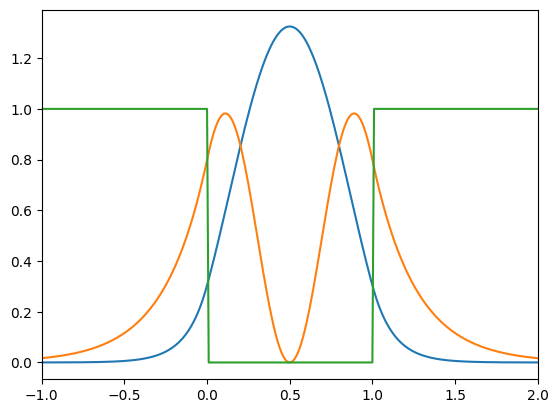

In [9]:
# plot normalized wave functions overlaid over the potential

Vx = []
for xval in x:
    if xval < 0.0:
        Vx.append(V0)
    elif xval < L:
        Vx.append(0.0)
    else:
        Vx.append(V0)

Vx = np.array(Vx)

plt.figure()
plt.plot(x, psi2)
plt.plot(x, Vx * 0.1)
plt.xlim(-1, 2)
plt.show()

### Practice

Now, you should re-run this part of the notebook with different values for the mass ($m$), the width of the well ($L$), and the height of the potential outside of the well ($V_0$). Ask yourself the following questions:

1. Does increasing $V_0$ increase or decrease the number of bound states?

2. Does increasing $L$ increase or decrease the number of bound states?

3. Does increasing $m$ increase or decrease the number of bound states?

4. For a given $m$, $L$, and $V_0$, which bound states have the highest / lowest tunneling probability (the probability of finding the particle outside of the well)? Can you rationalize this result?

5. Can the number of bound states ever be zero, for certain combinations of $m$, $L$, and $V_0$?

## Tunneling Through a Barrier